In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv")

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# EDA

In [3]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [4]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
from pandas_profiling import ProfileReport

In [6]:
report = ProfileReport(df)

In [7]:
report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [9]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# FEATURE SELECTION

In [10]:
df = df.drop(['UDI','Product ID','Type'],axis=1)

In [11]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [12]:
report_2 = ProfileReport(df)

report_2.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
for c in (df.columns):
    print(c," : ",df[c].sum())

Air temperature [K]  :  3000049.3
Process temperature [K]  :  3100055.6
Rotational speed [rpm]  :  15387761
Torque [Nm]  :  399869.1
Tool wear [min]  :  1079510
Machine failure  :  339
TWF  :  46
HDF  :  115
PWF  :  95
OSF  :  98
RNF  :  19


In [14]:
df.rename(columns={"Air temperature [K]":"Air_temp","Process temperature [K]":"Process_temp",'Rotational speed [rpm]':"Rotational_speed", 'Torque [Nm]':"Torque", 'Tool wear [min]':"Tool_ware"},inplace=True)

In [15]:
df.rename(columns={'Machine failure':"Machine_fail"},inplace=True)

In [16]:
df.columns

Index(['Air_temp', 'Process_temp', 'Rotational_speed', 'Torque', 'Tool_ware',
       'Machine_fail', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [17]:
import statsmodels.formula.api as smf

In [18]:
lm = smf.ols(formula="Air_temp ~ Process_temp + Rotational_speed + Torque + Tool_ware + Machine_fail", data=df).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Air_temp   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     6705.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:31:31   Log-Likelihood:                -13766.
No. Observations:               10000   AIC:                         2.754e+04
Df Residuals:                    9994   BIC:                         2.759e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -64.9721      2.021    -32.152      0.000     -68.933     -61.011
Process_temp         1.1784      0.006    182.169      0.000       1.166       1.191
Rotational_speed    -0.0001      0.000     -0.945      0.345      -0.000       0.000
Torque              -0.0041      0.002     -1.964      0.050      -0.008   -6.97e-06
Tool_ware           -0.0001      0.000     -0.788      0.431      -0.000       0.000
Machine_fail         0.6082      0.056     10.806      0.000       0.498       0.719
==============================================================================
Omnibus:                      692.130   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.046
Skew:                          -0.109   Prob(JB):                     4.14e-56
Kurtosis:                       2.249   Cond. No.                     3.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
df.columns

Index(['Air_temp', 'Process_temp', 'Rotational_speed', 'Torque', 'Tool_ware',
       'Machine_fail', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [20]:
lm = smf.ols(formula="Air_temp ~ Process_temp + Machine_fail + HDF + PWF + OSF + RNF", data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Air_temp   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     5750.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:31:31   Log-Likelihood:                -13655.
No. Observations:               10000   AIC:                         2.732e+04
Df Residuals:                    9993   BIC:                         2.737e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -64.0823      1.985    -32.281      0.000     -67.974     -60.191
Process_temp     1.1744      0.006    183.394      0.000       1.162       1.187
Machine_fail     0.0543      0.116      0.469      0.639      -0.173       0.282
HDF              1.6087      0.140     11.520      0.000       1.335       1.882
PWF              0.0675      0.140      0.482      0.630      -0.207       0.342
OSF             -0.1818      0.137     -1.330      0.184      -0.450       0.086
RNF             -0.0626      0.218     -0.287      0.774      -0.490       0.364
==============================================================================
Omnibus:                      644.404   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.708
Skew:                          -0.087   Prob(JB):                     8.87e-53
Kurtosis:                       2.262   Cond. No.                     6.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
lm = smf.ols(formula="Air_temp ~ Process_temp + Machine_fail + HDF", data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Air_temp   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.150e+04
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:31:31   Log-Likelihood:                -13656.
No. Observations:               10000   AIC:                         2.732e+04
Df Residuals:                    9996   BIC:                         2.735e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -64.0620      1.985    -32.280      0.000     -67.952     -60.172
Process_temp     1.1743      0.006    183.437      0.000       1.162       1.187
Machine_fail     0.0072      0.064      0.113      0.910      -0.118       0.133
HDF              1.6483      0.109     15.137      0.000       1.435       1.862
==============================================================================
Omnibus:                      642.685   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.155
Skew:                          -0.086   Prob(JB):                     1.17e-52
Kurtosis:                       2.262   Cond. No.                     6.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X_v1 = df.drop(columns=["Air_temp"])
Y_v1 = df['Air_temp']

In [23]:
X_v2 = df[['Process_temp','Machine_fail', 'HDF','TWF','PWF','OSF','RNF']]
Y_v2 = Y_v1

In [24]:
X_v1.head()

,Process_temp,Rotational_speed,Torque,Tool_ware,Machine_fail,TWF,HDF,PWF,OSF,RNF
0,308.6,1551,42.8,0,0,0,0,0,0,0
1,308.7,1408,46.3,3,0,0,0,0,0,0
2,308.5,1498,49.4,5,0,0,0,0,0,0
3,308.6,1433,39.5,7,0,0,0,0,0,0
4,308.7,1408,40.0,9,0,0,0,0,0,0


In [25]:
X_v2.head()

,Process_temp,Machine_fail,HDF,TWF,PWF,OSF,RNF
0,308.6,0,0,0,0,0,0
1,308.7,0,0,0,0,0,0
2,308.5,0,0,0,0,0,0
3,308.6,0,0,0,0,0,0
4,308.7,0,0,0,0,0,0


## Standerdize Data

In [26]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
scaler = StandardScaler()

In [28]:
arr = scaler.fit_transform(X_v1)
new_df = pd.DataFrame(arr)

new_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Veriable Inflation Factor

In [29]:
df_vif = pd.DataFrame()

In [30]:
df_vif['vif'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
df_vif['feature'] = X_v1.columns

df_vif.head()

,vif,feature
0,1.004799,Process_temp
1,5.171592,Rotational_speed
2,5.236156,Torque
3,1.039958,Tool_ware
4,11.829612,Machine_fail


In [31]:
df.head()

,Air_temp,Process_temp,Rotational_speed,Torque,Tool_ware,Machine_fail,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [32]:
arr = scaler.fit_transform(X_v2)
new_df = pd.DataFrame(arr)

new_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Veriable Inflation Factor

In [33]:
df_vif = pd.DataFrame()

In [34]:
df_vif['vif'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
df_vif['feature'] = X_v2.columns

df_vif.head()

,vif,feature
0,1.003871,Process_temp
1,11.789258,Machine_fail
2,4.564237,HDF
3,2.415432,TWF
4,3.495892,PWF


In [35]:
X_v1.drop(columns=['Machine_fail'],inplace=True,axis=1)

In [36]:
X_v1.head()

,Process_temp,Rotational_speed,Torque,Tool_ware,TWF,HDF,PWF,OSF,RNF
0,308.6,1551,42.8,0,0,0,0,0,0
1,308.7,1408,46.3,3,0,0,0,0,0
2,308.5,1498,49.4,5,0,0,0,0,0
3,308.6,1433,39.5,7,0,0,0,0,0
4,308.7,1408,40.0,9,0,0,0,0,0


In [37]:
X_v2.drop(columns=['Machine_fail'],inplace=True,axis=1)
X_v2.head()

C:\Users\Sadhin\AppData\Local\Temp\ipykernel_23956\1660633636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_v2.drop(columns=['Machine_fail'],inplace=True,axis=1)


,Process_temp,HDF,TWF,PWF,OSF,RNF
0,308.6,0,0,0,0,0
1,308.7,0,0,0,0,0
2,308.5,0,0,0,0,0
3,308.6,0,0,0,0,0
4,308.7,0,0,0,0,0


# Model Creation

In [38]:
# this is the best way to checking the model score over r2. Because Adj_r2 take counter of number of samples.
def adj_r2(x,y,lr_model):
    r2 = lr_model.score(x,y)
    n= x.shape[0]
    p=x.shape[1]
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
best=0.00
idx = 0
for i in range(1,135,1):
    x_train,x_test,y_train,y_test = train_test_split(arr, Y_v2, test_size=30, random_state=i, shuffle=True)
    lr = LinearRegression()
    lr.fit(X= x_train, y= y_train)
    res = adj_r2(x_test,y_test,lr)*100
    if res > best :
        idx = i
        best =res
    # best = max(res,best)
    # print(i,' --> ',adj_r2(x_test,y_test,lr)*100)

print("Best ",best,' ',i)

Best  85.03020392087977   134


In [41]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2,Y_v2, test_size=30, random_state=155, shuffle=True)
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1,Y_v1, test_size=30, random_state=155, shuffle=True)

## Simple Linear Model

In [42]:
LR = LinearRegression()

Coefficent:  [ 1.17391418e+00  1.96485304e-04  2.42906437e-04  8.15940538e-05
  1.17915992e-01  1.69569657e+00  6.29923260e-02 -1.11465382e-01
 -5.73750717e-02]
Inceptor:  -64.25486591235534


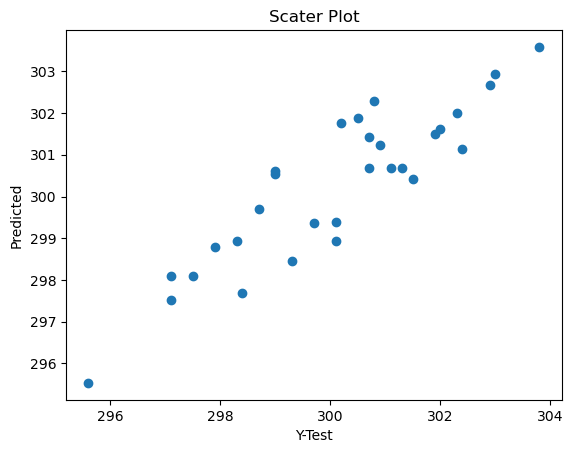

80.01338105821861

In [43]:
model_1 = LR.fit(X_train_v1, y_train_v1)

print("Coefficent: ", model_1.coef_)
print("Inceptor: ", model_1.intercept_)

y_hat_1 = model_1.predict(X_test_v1)

plt.scatter(x= y_test_v1, y= y_hat_1)
plt.title("Scater Plot")
plt.xlabel("Y-Test")
plt.ylabel("Predicted")
plt.show()

model_1.score(X_test_v1, y_test_v1)*100

Coefficent:  [ 1.17456217  1.65870145  0.13236193  0.11336065 -0.14044231 -0.0671133 ]
Inceptor:  -64.13471185770447


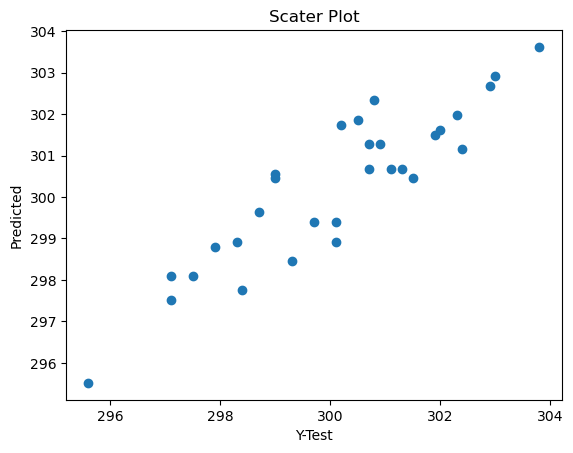

80.77901556538663

In [44]:
model_2 = LR.fit(X_train_v2, y_train_v2)

print("Coefficent: ", model_2.coef_)
print("Inceptor: ", model_2.intercept_)

y_hat_2 = model_2.predict(X_test_v2)

plt.scatter(x= y_test_v2, y= y_hat_2)
plt.title("Scater Plot")
plt.xlabel("Y-Test")
plt.ylabel("Predicted")
plt.show()

model_2.score(X_test_v2, y_test_v2)*100

In [45]:
import pickle

In [46]:
pickle.dump(model_1,open('lr_Model_1.pkl','wb'))
pickle.dump(model_2,open('lr_Model_2.pkl','wb'))

# Regularized Model

In [47]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV

## LASSOCV

In [48]:
lasso_cv = LassoCV(cv=5,max_iter=2000000000,normalize=True)
lasso_cv.fit(X_train_v2,y_train_v2)

c:\Users\Sadhin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=5, max_iter=2000000000, normalize=True)

In [49]:
lasso_lr = Lasso(alpha=lasso_cv.alpha_)

lasso_lr.fit(X_train_v2,y_train_v2)

Lasso(alpha=2.4877442309858464e-05)

In [50]:
lasso_lr.score(X_test_v2,y_test_v2)

0.8077863003298331

In [51]:
adj_r2(x=X_test_v2,y=y_test_v2,lr_model=lasso_lr)

0.7576435960680504

In [52]:
pickle.dump(lasso_lr,open('lasso_model.pkl','wb'))

## Ridge-CV

In [53]:
reidge = RidgeCV(alphas=np.random.uniform(0,10,150) ,cv=5,normalize=True)
reidge.fit(X_train_v2,y_train_v2)

reidge.alpha_

c:\Users\Sadhin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\Sadhin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

0.048112610548626256

In [54]:
ridgre_lr = Ridge(alpha= reidge.alpha_)
ridgre_lr.fit(X_train_v2,y_train_v2)

ridgre_lr.score(X_test_v2,y_test_v2)

0.8077886902172557

In [55]:
adj_r2(x=X_test_v2,y=y_test_v2,lr_model=ridgre_lr)

0.7576466094043659

In [56]:
pickle.dump(ridgre_lr,open('ridgre_model.pkl','wb'))

## ElasticNet

In [57]:
elastic_cv = ElasticNetCV(alphas=None, cv=5)
elastic_cv.fit(X_train_v2,y_train_v2)


ElasticNetCV(cv=5)

In [58]:
elastic_cv.alpha_

0.005199645573631624

In [59]:
elastic_cv.l1_ratio_

0.5

In [60]:
elastic_lr = ElasticNet(alpha= elastic_cv.alpha_, l1_ratio= elastic_cv.l1_ratio_)
elastic_lr.fit(X_train_v2,y_train_v2)

ElasticNet(alpha=0.005199645573631624)

In [61]:
elastic_lr.score(X_test_v2,y_test_v2)

0.8046397498959901

In [62]:
adj_r2(x=X_test_v2,y=y_test_v2,lr_model=elastic_lr)

0.7536762063905962

In [64]:
pickle.dump(elastic_lr,open('elasticnet_model.pkl','wb'))